# Uncertainty

### Import data to R

In [1]:
#Set the working directory to the specific location of the files on your computer
#note: In this case, the working directory was set for my computer
setwd("/Users/Brandon/Harding_ML_Class")

In [2]:
#Import the data file web-browsers into R
browser <- read.csv("web-browsers.csv")

#note that since the imported dataset has column names, it will be treated as a dataframe

### Let's view the size of our dataset and the first few rows to a get a feel for the web-browsers dataset. Note that the web-browser dataset will now be reffered to as browser

In [3]:
#View the dimensions of the browser dataset with dim()
dim(browser)

#output will be number of rows then number of columns

[1] 10000     7

In [4]:
#View the first 6 rows of browser with the function head
head(browser)

#Similarly, the last 6 rows of browser can be viewed with the tail function
tail(browser)

#note that for the tail function, Jupyter notebook gives an extra column only
# in the output to show each of the observations index

id,anychildren,broadband,hispanic,race,region,spend
1,0,1,0,white,MW,424
2,1,1,0,white,MW,2335
3,1,1,0,white,MW,279
4,0,1,0,white,MW,829
5,0,1,0,white,S,221
6,0,1,0,white,MW,2305


,id,anychildren,broadband,hispanic,race,region,spend
9995,9995,1,1,0,white,MW,12146
9996,9996,1,1,1,white,S,102
9997,9997,1,1,1,white,MW,5096
9998,9998,1,1,0,white,NE,883
9999,9999,0,1,0,white,NE,256
10000,10000,0,0,0,white,NE,6


In [5]:
#To view the variables with their corresponding data types, us the str() function
str(browser)

#Note that Factor columns are categorical with number of levels being the number of categories
# and Int or Float are numeric columns. The numbers for Factor columns listed in str() indicate
# the index for the factor level. The levels for a factor variable can be viewed with levels()

'data.frame':	10000 obs. of  7 variables:
 $ id         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ anychildren: int  0 1 1 0 0 0 1 1 0 1 ...
 $ broadband  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ hispanic   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ race       : Factor w/ 4 levels "asian","black",..: 4 4 4 4 4 4 4 1 4 4 ...
 $ region     : Factor w/ 4 levels "MW","NE","S",..: 1 1 1 1 3 1 3 1 4 2 ...
 $ spend      : int  424 2335 279 829 221 2305 18 5609 2313 185 ...


### Let's view a histogram plot of the variable spend for the browser dataset.

#### You will notice that the first histogram will showcase the spend variable on its original scale and a second histogram on the log scale. The log scale will illustrate a roughly normal distribution for the spend variable.

In [18]:
#View summary statistics for the spend column using the function summary
summary(browser$spend)

#Similarly, we can compute summary statistics for the variable spend through the command
summary(browser[,"spend"])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     162     510    1946    1523  401338 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     162     510    1946    1523  401338 

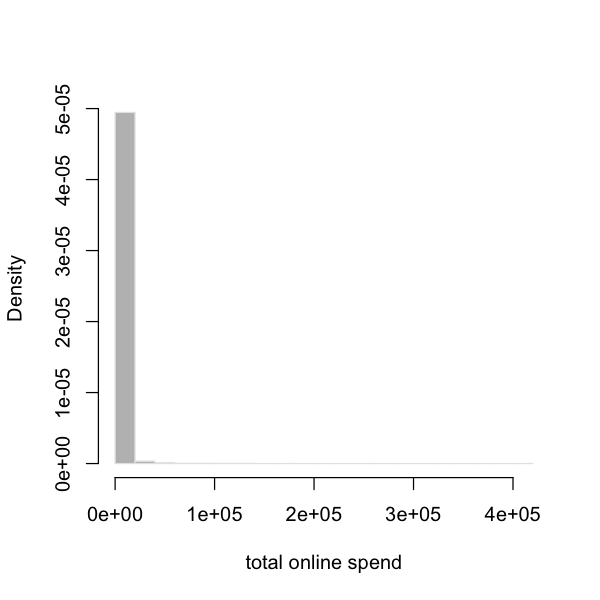

In [6]:
#Draw histogram for spend

#set graphical parameters (this is only needed for jupyter notebooks)
options(repr.plot.width = 5, repr.plot.height = 5)

#The hist() function calls the histogram
hist(browser$spend, freq=FALSE,
     main="", xlab="total online spend", col=8, border="grey90")

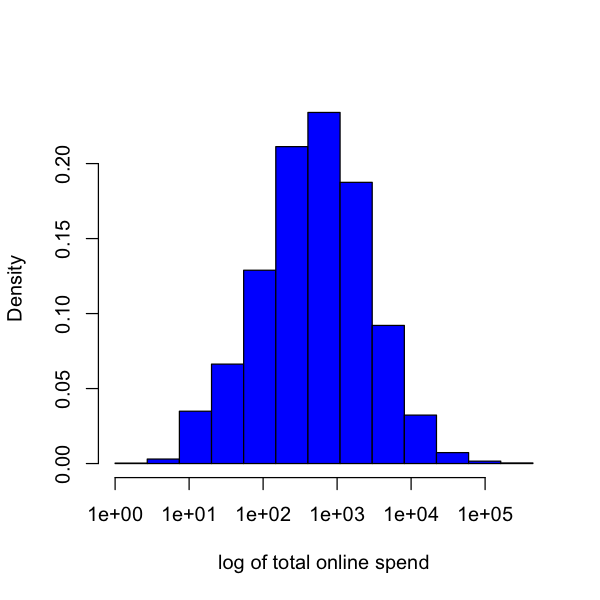

In [7]:
#Draw histogram for the variable spend on the log scale

#Take the log of the variable spend
log_spend <- log(browser$spend)

#Call the main histogram
hist(log_spend, freq=FALSE, main="", xlab="log of total online spend", col="blue", border="black",
     xaxt="n" #tells hist function to not create the x-axis as it will be set in following function
     )

#Create a vector to signify the specific labels we want for the x-axis of the histogram
lgrid = c(1,10,100,1000,10000,100000)

#Set x-axis of histogram (don't worry to much with details of this axis function)
axis(1, at=log(lgrid), labels=sprintf("%.0e",lgrid))

### Now that we've seen that the distribution of the log of the spend variable is roughly normal, let's create the sampling distribution.

In [8]:
#Calculate only the mean of the spend column
mean(browser$spend)

[1] 1946.439

In [9]:
#Calculate only the variance of the spend column
var(browser$spend)

[1] 64619254

In [10]:
#Calculate only the variance of the spend calumn
sd(browser$spend)

[1] 8038.61

In [11]:
#If we consider the browser dataset to be a sample of 10,000 households,
#then the sampling distribution's mean should be
xbar <- mean(browser$spend)

#the sampling distribution's standard deviation should be
xbse <- sd(browser$spend)/sqrt(nrow(browser))

#note that nrow() computes the number of rows/observations for a given datframe

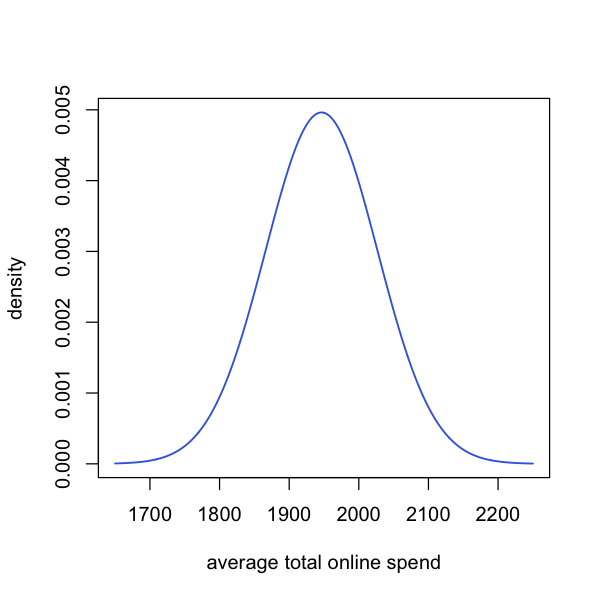

In [12]:
#Plot the sampling distribution

#First, create a vector of values to be fed in the sampling distrubtion pdf
calc_values <- seq(1650,2250,length=1000)

#Second, feed the values created above into the sampling distribution pdf created with dnorm function
samp_pdf_values <- dnorm(calc_values, xbar, xbse)

#Third, plot the calc_values versus the sample_pdf_values for a view of the sample distribution
plot(calc_values, samp_pdf_values, type="l", col="royalblue", lwd=1.5,
     xlab="average total online spend", ylab="density")

## Nonparametric Bootstrap

### Let's try to mimic the sampling distribution created under the central limit theorem with the nonparametric bootstrap method.

In this case, we will perform repeated __sampling with replacement__ from the sample, the current sample being our browser's dataset. From each of these sample, we will calculate the mean and store the value. The resulting set of sample means can be used similar to the theoretical CLT case to find standard errors, etc.

In [13]:
#Set number of samples to be taken
B <- 10000

In [14]:
#Create an empty vector to store the calculated means of the samples
mub <- c()

In [15]:
#Contsruct a for-loop to calculate the mean of samples of the browser dataset
for (b in 1:B){
    #Sample indicies with replacement from 1 to the number of observations in browser
    samp_b <- sample.int(nrow(browser), replace=TRUE)
    #Take the mean of values selected in spend that match the indicies sampled above
    b_mean <- mean(browser$spend[samp_b])
    #Add b_mean to the vector that stores the sample mean values
    mub[b] <- b_mean
}

In [16]:
#Calculate the mean and standard deviation of the sample of means collected above
mean(mub)
sd(mub)

[1] 1944.52

[1] 81.10834

#### Let's view a histogram of the nonparametric bootstrap sample means overlayed with the theoretical sampling distribution under CLT.

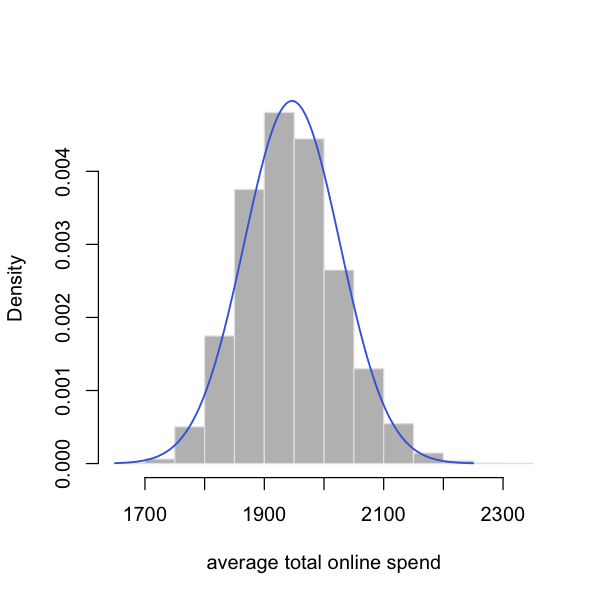

In [17]:
#View a histogram of the sample means created through bootstrap
hist(mub, main="", xlab="average total online spend",
     col=8, border="grey90", freq=FALSE)
#Overlay the theoretical sampling distribution under CLT on the histogram
lines(calc_values, samp_pdf_values, col="royalblue", lwd=1.5)

## Regression Example

### The nonparametric bootstrap can be used to generate sampling distribution for regression parameters. Let's look at the following regression in which we regress the log of total household spending against households having broadband internet and any children (note: that both regressors are indicators).

\begin{align}
\log(spend) & = \beta_0 + \beta_1 1_{[broadband]} + \beta_2 1_{[children]} + \epsilon
\end{align}

In [19]:
##Estimating the regression parameters by least squares regression

#Perform regression with glm command
linereg <- glm( log(spend) ~ broadband + anychildren, data=browser)

#View regression results
sl <- summary(linereg)
sl


Call:
glm(formula = log(spend) ~ broadband + anychildren, data = browser)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.2379  -1.0787   0.0349   1.1292   6.5825  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.68508    0.04403 129.119   <2e-16 ***
broadband    0.55285    0.04357  12.689   <2e-16 ***
anychildren  0.08216    0.03380   2.431   0.0151 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 2.737459)

    Null deviance: 27828  on 9999  degrees of freedom
Residual deviance: 27366  on 9997  degrees of freedom
AIC: 38454

Number of Fisher Scoring iterations: 2


In [20]:
#Notice from the regression results above, if we were to construct a 95% confidence interval
# for broadband variable we would have the following

sl$coefficients["broadband","Estimate"] + c(-2,2)*sl$coefficients["broadband","Std. Error"]

[1] 0.4657063 0.6399872

#### Find regression parameters through nonparametric bootstrap approach.

In [21]:
##Perform nonparametric bootstrap

#Set the number of repeated samples to perform
B <- 1000

#Create an empty vector to store the betas generated from boostrap
betas <- c()

#Construct for-loop to perform the boostrap
for (b in 1:B) {
    #Sample indicies with replacement from 1 to the number of observations in browser
    samp_b = sample.int(nrow(browser), replace=TRUE)
    #Reduce browser dataset down to observations that match the indicies selected in the sample above
    reduced_browser <- browser[samp_b,]
    #Perform regresson on the reduced dataframe with only the observations sampled
    reg_b <- glm(log(spend) ~ broadband + anychildren, data=reduced_browser)
    #Store the sample betas in the betas vector
    betas <- rbind(betas, coef(reg_b))
}

#### Notice that each row of the betas matrix is a single draw of the joint distribution of the three regression parameters.

In [22]:
#view the betas
head(betas)

(Intercept),broadband,anychildren
5.726773,0.5374252,0.03035102
5.735626,0.5427143,0.05674069
5.669220,0.6025585,0.06066262
5.712285,0.5513549,0.05521528
5.635719,0.5625429,0.16112615
5.609680,0.6146876,0.10016887


In [23]:
#Look at the sampling correlation between the broadband and children coefficients
cor(betas[,"broadband"], betas[,"anychildren"])

[1] -0.02748822

#### Let's look to compare the marginal (single variable) sampling distributions for the coefficients to the theoretical ones.

#### For broadband coefficient:

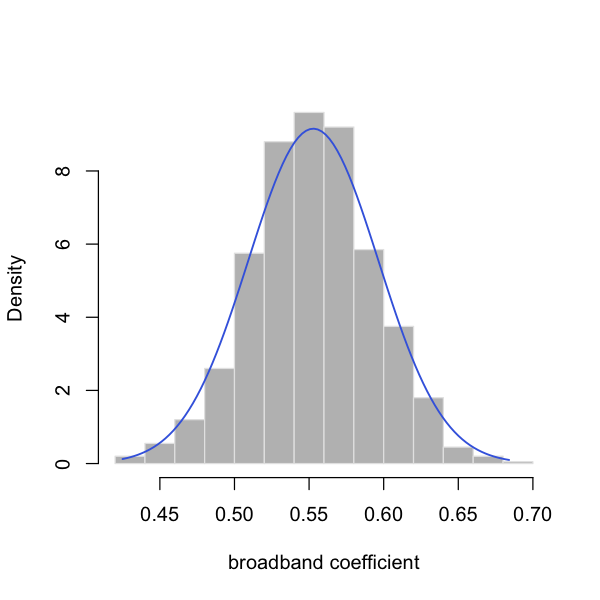

In [24]:
##Plot the histogram of the bootstrap broadband betas
hist(betas[,2], main="", xlab="broadband coefficient",
     col=8, border="grey90", freq=FALSE)

##Overlay the histogram with the theoretical pdf

#First, create a vector of values to be fed in the sampling distrubtion pdf
calc_values <- seq(min(betas[,2]),max(betas[,2]),length=100)

#Second, feed the values created above into the sampling distribution pdf created with dnorm function
samp_pdf_values <- dnorm(calc_values
                         ,sl$coefficients["broadband","Estimate"]
                         ,sl$coefficients["broadband","Std. Error"]
                         )

#Third, plot pdf on histogram
lines(calc_values, samp_pdf_values, col="royalblue", lwd=1.5)




#### Further, let's consider the multiplicative effect of broadband on spending. This is simply an exponential tranformation of the betas we just calculated.

#### For the broadband coefficient:

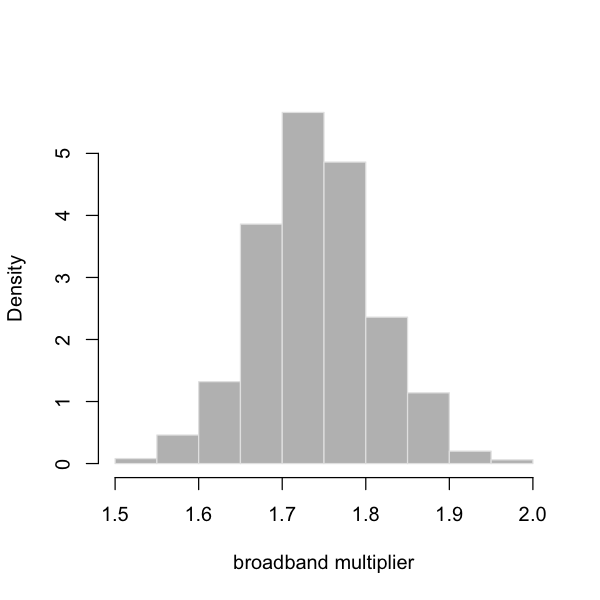

In [25]:
#Exponentially transform the broadband betas
exp_betas <- exp(betas[,2])

#Plot a histogram of the exponential broadband betas to see the multiplicative effect
hist(exp(betas[,2]), main="", xlab="broadband multiplier",
     col=8, border="grey90", freq=FALSE)



## Parametric Bootstrap

When the nonparametric bootstrap fails, look to use the parametric bootstrap. The parametric bootstrap functions by a repeated process of sampling from newly generated data specified by a fitted model.

In [26]:
#Build the fitted model to sample from
xbar <- mean(browser$spend)
sig2 <- var(browser$spend)

In [27]:
##Perform parametric bootstrap

#Set the number of repeated samples to perform
B <- 1000

#Create an empty vector to store the sample means generated from boostrap
mus <- c()

#Construct for-loop to perform the boostrap
for (b in 1:B) {
    #Randomly generate 1e4 observations from the normal distribution xbar and sig2
    xsamp <- rnorm(n = 1e4, mean = xbar, sd = sqrt(sig2))
    #Take the mean of values genratedabove
    b_mean <- mean(xsamp)
    #Add b_mean to the vector that stores the sample mean values
    mus[b] <- b_mean
}

In [28]:
#Calculate variance and standard deviation of the sample of means collected above
var(mus)
sd(mus)

#note that these values match up with that of the theoretical standard errors found below
sqrt(sig2/1e4)

[1] 6138.824

[1] 78.35065

[1] 80.3861

## Nonparametric Bootstrap for Confidence Intervals

Recall the sample variance of form \begin{align} s^2 = \sum_i (x_i - \bar{x})^2/n \end{align} is a biased estimate of the true population variance. We correct for this bias with the sample standard deviation of the form \begin{align} \sqrt{\frac{s^2 n}{(n-1)}} \end{align} Let's show this with a quick example.

In [36]:
#Take a small sample of 100 observations from browser
smallsamp <- browser$spend[sample.int(nrow(browser),1000)]

#Calculate the sample standard deviation of the small sample
s <- sd(smallsamp) # sample variance
s

[1] 13144.85

In [37]:
#Calculate the standard deviation of the entire browser dataset
sd(browser$spend)

#View the proportional difference in magnitude of the standard deviations
s/sd(browser$spend)

[1] 8038.61

[1] 1.635214

### Notice that the small smaple standard deviation is more than 5% different in magnitude than the full sample standard deviation. The CI Bootstrap algorithm can help us correct for this inconsistency.

In [38]:
##Perform the CI Bootstrap algorithm

#Set the number of repeated samples to perform
B <- 10000

#Create an empty vector to store the bootsrap errors
eb <- c()

for (b in 1:B){
    #Resample with replacement 100 times from smallsamp generated above and take standard deviation
    sb <- sd(smallsamp[sample.int(100, replace=TRUE)])
    #Calculate the error between the samp_b standard deviation and the standard deviation of smallsamp
    error_b <- sb-s
    #Store the calculated error above in the eb vector
    eb[b] <- error_b
}

In [39]:
#Notice that the mean of the bootstrap errors is not 0, thus indicating our estimator is biased.
mean(eb)

#When we substract the errors off our full sample standard deviation s (look above)
# we can correct for the bias
mean(s-eb)
#compare to
sd(browser$spend)

[1] -10932.66

[1] 24077.51

[1] 8038.61

In [40]:
##Construct a 90% confidence interval around s

#Since the confidence interval uses a t-distribution, find the 5% and 95% values of the eb t-distribution
tvals <- quantile(eb, c(0.05, 0.95))
tvals

#Create the 90% confidence interval
s - tvals[2:1]

5%       95% 
-11496.78 -10393.72

95%       5% 
23538.57 24641.63

## Hypothesis Testing and False Discovery Rate Control

This section will walk through the implementation of the Benjamini-Hochberg (BH) FDR Control Algorithm. We will utlize the following regression for analysis

\begin{align}
\log(spend) & = \beta_0 + \beta_1 1_{[broadband]} + \beta_2 1_{[children]} + \beta_3 race + \beta_4 ethnicity + \beta_5 region + \epsilon
\end{align}

In [41]:
#Perform the regression above
spendy <- glm( log(spend) ~ .-id, data=browser)

#Extract coefficient table rounded to two decimal places
round(summary(spendy)$coef,2)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),5.86,0.16,36.34,0.00
anychildren,0.09,0.03,2.54,0.01
broadband,0.52,0.04,11.93,0.00
hispanic,-0.18,0.04,-4.30,0.00
raceblack,-0.25,0.18,-1.41,0.16
raceother,-0.41,0.31,-1.32,0.19
racewhite,-0.21,0.15,-1.36,0.17
regionNE,0.26,0.05,4.98,0.00
regionS,0.01,0.04,0.13,0.90
regionW,0.18,0.05,3.47,0.00


In [42]:
#Extract p-values for each regressor from the regression ouput
pval <- summary(spendy)$coef[-1,"Pr(>|t|)"]

### Assume we want to control our FDR such that it is no more than 0.25. We will showcase which variables we accept as significant based on the BH algorithm through a simple graphical plot.

1. The first step in the BH algorithm is to  generate the p-values for the regressors which was performed above.
2. The second step is to arrange our p-values from smallest to largest .
3. The third step is to generate the p-value cutoffs for each p-value based on p(k) <= (q/n)*k for k is the k order statistic (By using a grapghical plot, each p-value cutoff is the point on the line with slope q/n with q being the specified FDR cutoff and n being the number of coefficients excluding the intercept

Note the following code will generate a graphical plot to view the variables that are significant according to the BH algorithm. These variables will fall below the black line.

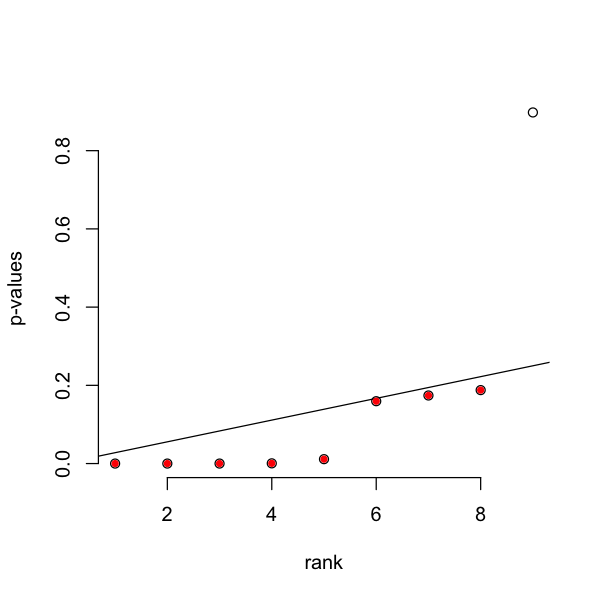

In [43]:
###Construct a plot for which variables are significant

##Sort the p-values from smallest to greatest
sorted_p <- sort(pval)

##Plot p-values
plot(sorted_p, bty="n", xlab="rank", ylab="p-values")

##Add the line of significance
#Define q
q <- 0.25
#Define n
n <- 9
#Add line to plot
abline(a=0, b=.25/9)

##Distinguish p-values that are under the line of significance
points(sorted_p[1:8], col=2, pch=20)